# networkx를 이용한 실습


`%`시작 명령어:  "magic"명령어, Jupyter notebook용. `%matplotlib inline`은 그래픽을 바로 보여지도록 지정함

In [ ]:
import networkx as nx
%matplotlib inline

# 방향성없는 그래프 그리기: Undirected graph

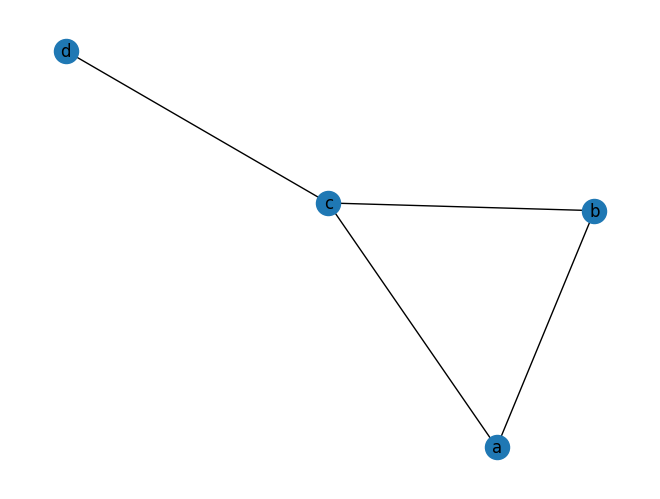

In [ ]:
# undirected graph
G = nx.Graph()

# 노드 a 추가
G.add_node('a')

# 리스트와 같은 시퀀스의 원소들을 노드로 추가
nodes_to_add = ['b', 'c', 'd']
G.add_nodes_from(nodes_to_add)

# 노드 간 엣지 추가: undirected는 순서 중요하지 않음
G.add_edge('a', 'b')

# 튜플로 정의된 엣지의 리스트로 추가
edges_to_add = [('a', 'c'), ('b', 'c'), ('c', 'd')]
G.add_edges_from(edges_to_add)

# 그래프 그리기
nx.draw(G, with_labels=True)

- draw 함수의 설정

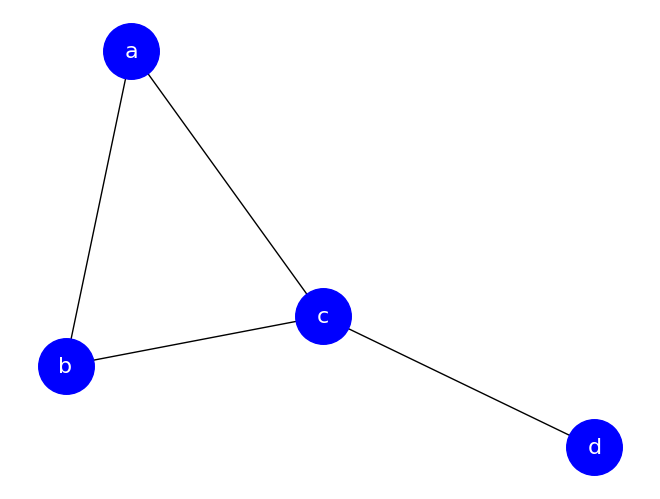

In [ ]:
nx.draw(G,
        with_labels=True,
        node_color='blue',
        node_size=1600,
        font_color='white',
        font_size=16,
        )

# Graph methods
- 생성된 그래프의 메소드(함수)

In [ ]:
# 노드 출력
G.nodes

NodeView(('a', 'b', 'c', 'd'))

In [ ]:
# 엣지 출력
G.edges

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')])

- 위의 결과에는 반복문 사용 가능

In [ ]:
for node in G.nodes:
    print(node)

a
b
c
d


In [ ]:
for edge in G.edges:
    print(edge)

('a', 'b')
('a', 'c')
('b', 'c')
('c', 'd')


- 노드와 엣지의 수 파악

In [ ]:
G.number_of_nodes()

4

In [ ]:
G.number_of_edges()

4

`.neighbors()` method: 주어진 노드의 이웃을 발견

In [ ]:
G.neighbors('b')

In [ ]:
list(G.neighbors('b'))

['a', 'c']

- 반복문으로 확인

In [ ]:
for neighbor in G.neighbors('b'):
    print(neighbor)

a
c


# NetworkX functions vs. Graph methods


In [ ]:
nx.is_tree(G)

False

In [ ]:
nx.is_connected(G)

True

- Node and edge existence 체크

In [ ]:
G.has_node('a')

True

In [ ]:
G.has_node('x')

False

- in 연산자를 활용한 노드 포함여부 확인

In [ ]:
'd' in G.nodes

True

- 엣지 확인

In [ ]:
G.has_edge('a', 'b')

True

In [ ]:
G.has_edge('a', 'd')

False

In [ ]:
('c', 'd') in G.edges

True

- 다양한 종류의 그래프

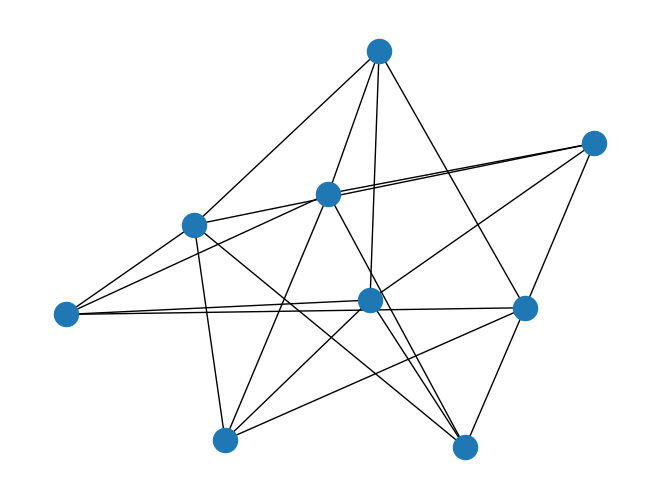

In [ ]:
B = nx.complete_bipartite_graph(4,5)
nx.draw(B)

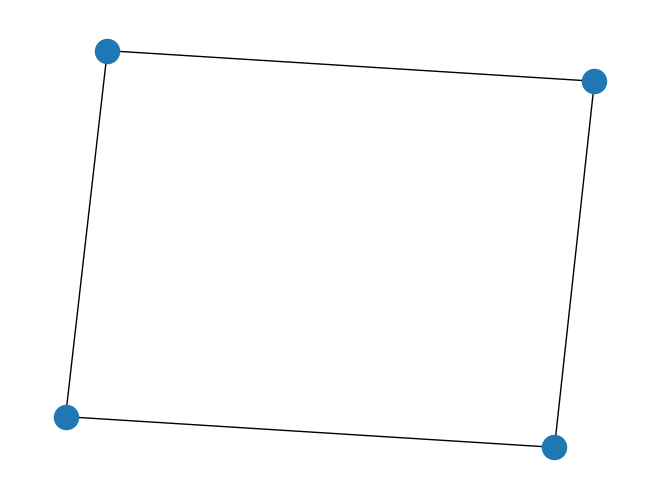

In [ ]:
C = nx.cycle_graph(4)
nx.draw(C)

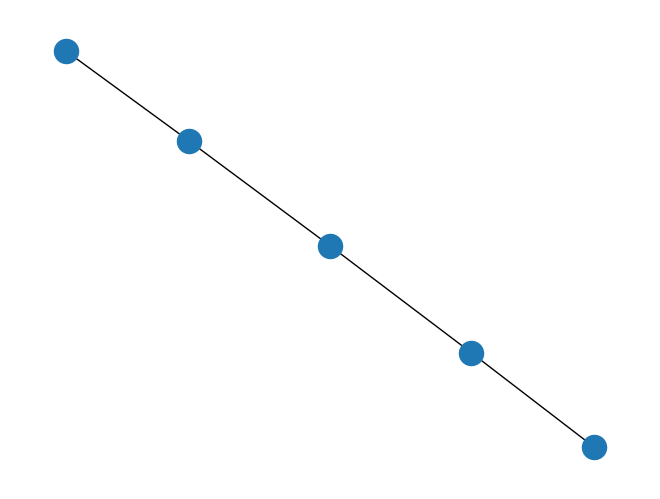

In [ ]:
P = nx.path_graph(5)
nx.draw(P)

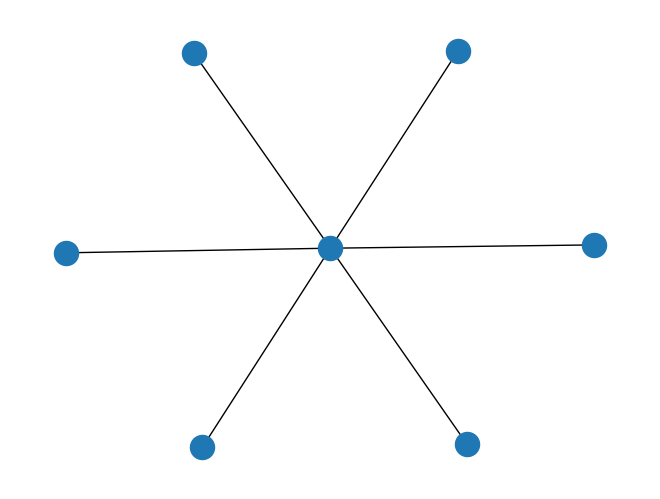

In [ ]:
S = nx.star_graph(6)
nx.draw(S)

- density와 Sparsity

In [ ]:
nx.density(G)

In [ ]:
nx.density(B)

0.5555555555555556

In [ ]:
CG = nx.complete_graph(100)
nx.density(CG)

1.0

In [ ]:
clique = nx.subgraph(CG, (0,1,2))
nx.density(clique)

1.0

# Node degree
- 얼마나 많은 다른 노드와 연결되었는지를 확인
-  `.neighbors()` 결과의 개수

In [ ]:
len(list(G.neighbors('a')))

2

- 위와 동일한, a노드의 연결정도

In [ ]:
G.degree('a')

2

- 참고사항

In [ ]:
items = ['spider', 'y', 'banana']
[item.upper() for item in items]

['SPIDER', 'Y', 'BANANA']

- NetworkX에 응용

In [ ]:
print(G.nodes())
print([G.degree(n) for n in G.nodes()])

['a', 'b', 'd', 'c']
[2, 1, 2, 1]


- 관련 예제

In [ ]:
g = (len(item) for item in items)
list(g)

[6, 1, 6]

In [ ]:
max(len(item) for item in items)

6

In [ ]:
sorted(item.upper() for item in items)

['BANANA', 'SPIDER', 'Y']

- Node 이름 정하기

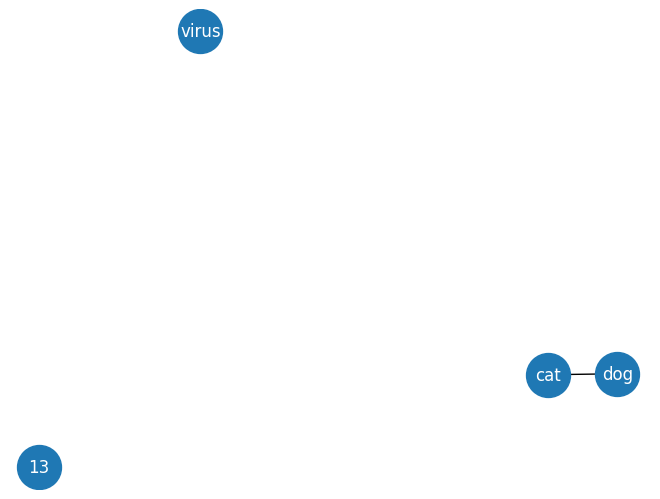

In [ ]:
G = nx.Graph()

G.add_nodes_from(['cat','dog','virus',13])

G.add_edge('cat','dog')

nx.draw(G, with_labels=True, font_color='white', node_size=1000)

- Adjacency lists란?

```
a d e
b c
c
d
e
```
 - 이 때 엣지의 생성:
```
(a, d)
(a, e)
(b, c)
```
 - 예: `friends.adjlist`

In [ ]:
print(open('friends.adjlist').read())

George Frank Dennis
Dennis Claire Esther
Claire Frank Alice Esther
Bob Alice
Frank Alice
Alice
Esther
Shelly



-  `nx.read_adjlist()`를 활용하여 읽기

In [ ]:
SG = nx.read_adjlist('friends.adjlist')

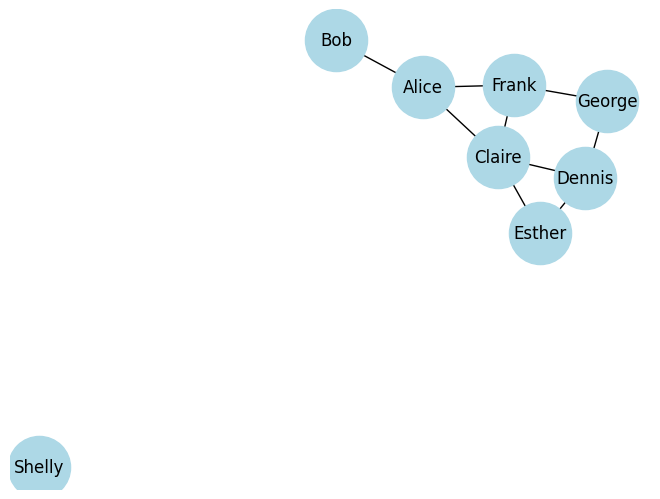

In [ ]:
nx.draw(SG, node_size=2000, node_color='lightblue', with_labels=True)

In [ ]:
SG.degree('Alice')

3

# Directed graphs

- 방향성 있는 그래프
- `DiGraph` 객체

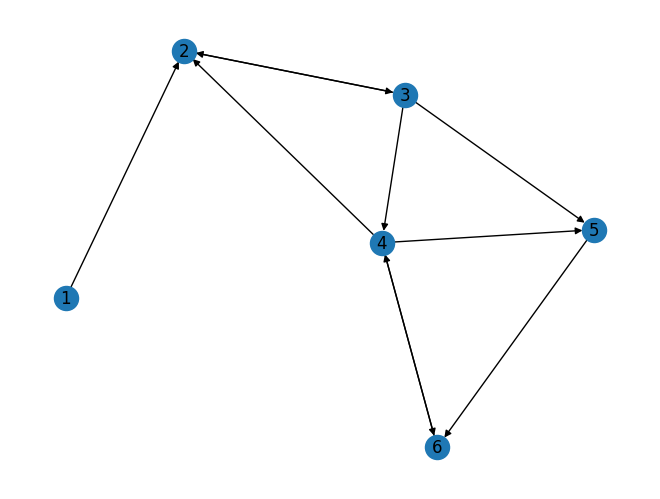

In [ ]:
D = nx.DiGraph()

D.add_edges_from([(1,2),(2,3),(3,2),(3,4),(3,5),(4,5),(4,6),(5,6),(6,4),(4,2)])

nx.draw(D, with_labels=True)

In [ ]:
D.has_edge(1,2)

True

In [ ]:
D.has_edge(2,1)

False

- 방향성을 고려해서, neighbor 대신 predecessors ("in-neighbors"),  successors ("out-neighbors")가 있음.

In [ ]:
print('Successors of 2:', list(D.successors(2)))

print('Predecessors of 2:', list(D.predecessors(2)))

Successors of 2: [3]
Predecessors of 2: [1, 3, 4]


- degree도 in-degree, out-degree를 구분

In [ ]:
D.in_degree(2)

3

In [ ]:
D.out_degree(2)

1

- 방향성있는 그래프에서 `neighbors` method는 `successors`와 동일

In [ ]:
D.degree(2)

4

In [ ]:
print('Successors of 2:', list(D.successors(2)))
print('"Neighbors" of 2:', list(D.neighbors(2)))

Successors of 2: [3]
"Neighbors" of 2: [3]
